In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd

# Create a dataset

In [2]:
X, y = make_classification(n_samples = 2000, n_features = 20, n_informative = 19, n_redundant = 1, n_classes = 2, random_state = 42)
X.shape

(2000, 20)

In [3]:
np.unique(y)

array([0, 1])

# Standardizing the train data

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Train the Logistic Regression Model on Data

In [5]:
model = LogisticRegression()
LR = model.fit(X, y)

# Generating Unseen test data

In [6]:
X_test, y_test = make_classification(n_samples = 400, n_features = 20, n_informative = 19, n_redundant = 1, n_classes = 2, random_state = 42)

# Standardizing the test data

In [7]:
X_test = sc.transform(X_test)

# Get Predictions from test data

In [8]:
y_pred = LR.predict(X_test)

In [10]:
Accuracy = sum(y_pred == y_test)/len(y_test)
Accuracy

0.5225

# Calculating Accuracy

In [11]:
Accuracy = np.mean(y_pred == y_test) * 100
print("Avg accuracy : %2.2f" % (Accuracy))

Avg accuracy : 52.25


# Creating Confusion Matrix

In [12]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

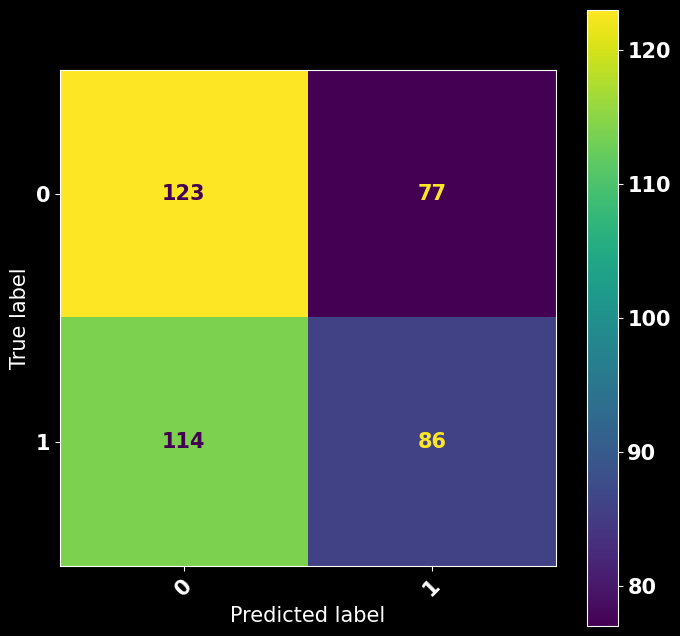

In [13]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

# Calculating Accuracy, Precision, Recall, F1-Score

In [14]:
Accuracy = accuracy_score(y_test, y_pred, normalize=True).round(3)
Precision = precision_score(y_test, y_pred, average = 'macro').round(3)   # macro calculate the average value of classes.
Recall = recall_score(y_test, y_pred, average = 'macro').round(3)
F1_Score = f1_score(y_test, y_pred, average = 'macro').round(3)

print('Accuracy : ', Accuracy)
print(" ")
print('Precision : ', Precision)
print(" ")
print('Recall : ', Recall)
print(" ")
print('F1_Score : ', F1_Score)
print(" ")


Accuracy :  0.522
 
Precision :  0.523
 
Recall :  0.522
 
F1_Score :  0.518
 


# Printing Classification Report

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.61      0.56       200
           1       0.53      0.43      0.47       200

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.52      0.52      0.52       400



# Plotting ROC Curve

In [16]:
from sklearn.metrics import RocCurveDisplay

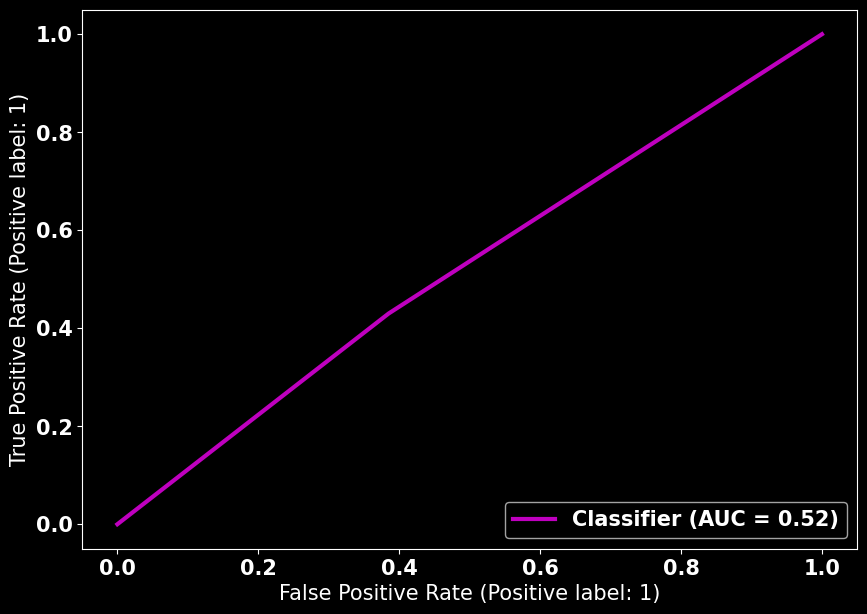

In [18]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
RocCurveDisplay.from_predictions(y_test, y_pred, drop_intermediate = False, ax = ax, lw = 3, color ='m')
plt.show()

# Using Cross Validation For Logistic Regression

In [19]:
k = 5
cv = KFold(n_splits=k, random_state = 42 , shuffle=True)

# Build multiple logistic regression model
model_cv = LogisticRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model_cv, X, y, scoring='accuracy', cv=cv )
np.mean(scores)
print("Avg accuracy : %0.2f" % (np.mean(scores)))

Avg accuracy : 0.83


In [20]:
y_pred_cv = cross_val_predict(model_cv, X_test, y_test, cv = cv)

In [21]:
Accuracy = np.mean(y_pred_cv == y_test) * 100
print("Avg accuracy : %2.2f" % (Accuracy))

Avg accuracy : 77.75


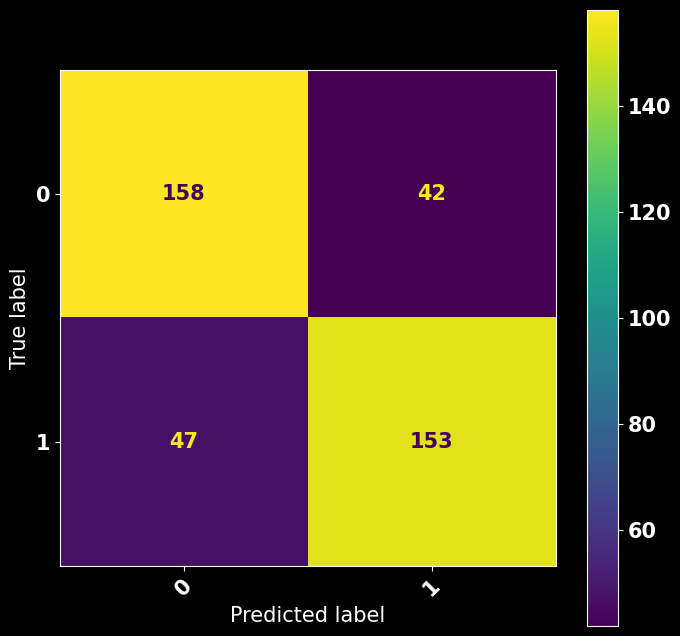

In [22]:
cm = confusion_matrix(y_test, y_pred_cv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

In [23]:
Accuracy = accuracy_score(y_test, y_pred_cv, normalize=True).round(3)
Precision = precision_score(y_test, y_pred_cv, average = 'macro').round(3)   # macro calculate the average value of classes.
Recall = recall_score(y_test, y_pred_cv, average = 'macro').round(3)
F1_Score = f1_score(y_test, y_pred_cv, average = 'macro').round(3)

print('Accuracy : ', Accuracy)
print(" ")
print('Precision : ', Precision)
print(" ")
print('Recall : ', Recall)
print(" ")
print('F1_Score : ', F1_Score)
print(" ")


Accuracy :  0.778
 
Precision :  0.778
 
Recall :  0.778
 
F1_Score :  0.777
 


In [24]:
print(classification_report(y_test,y_pred_cv))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       200
           1       0.78      0.77      0.77       200

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



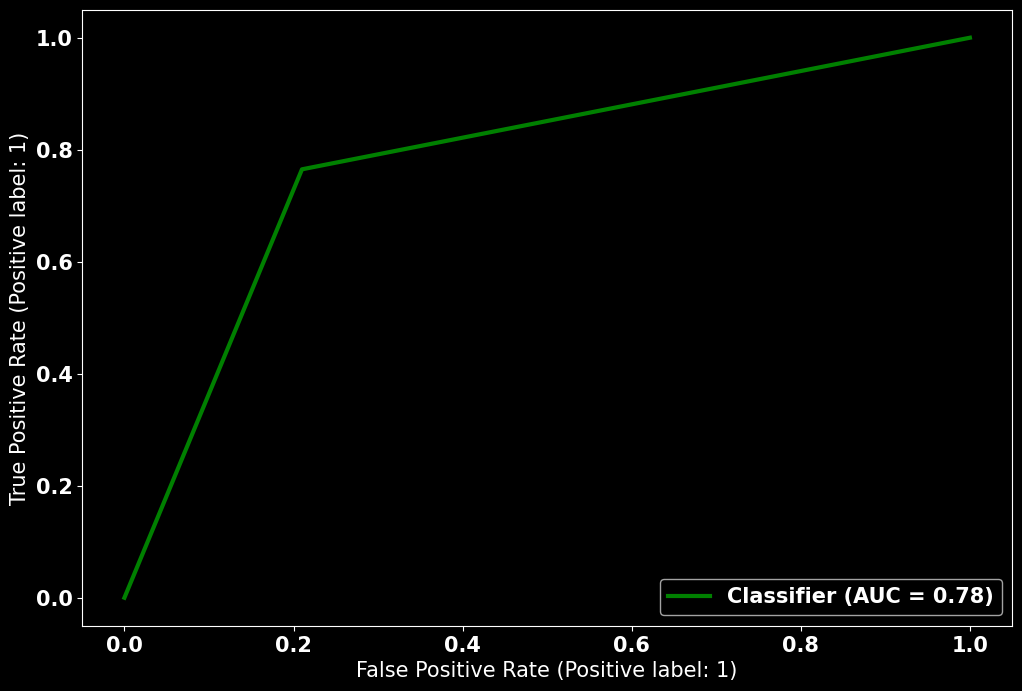

In [25]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
RocCurveDisplay.from_predictions(y_test, y_pred_cv, drop_intermediate = False, ax = ax, lw = 3, color ='g')
plt.show()